In [4]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\patri\mtb_project_scrape.csv')

In [3]:
df.head()

,name_name,name_url,name_miles,name_miles_url,name_elevation_gain,name_elevation_gain_url,name_elevation_down,name_elevation_down_url,name_location,name_location_url,name_level,name_level_url
0,The Whole Enchilada,https://www.mtbproject.com/trail/4670265/the-w...,34.1 mi,https://www.mtbproject.com/trail/4670265/the-w...,"1,283' Up",https://www.mtbproject.com/trail/4670265/the-w...,"7,794' Down",https://www.mtbproject.com/trail/4670265/the-w...,"Moab, UT",https://www.mtbproject.com/trail/4670265/the-w...,Difficult,https://www.mtbproject.com/trail/4670265/the-w...
1,Gooseberry Mesa - The Big Loop,https://www.mtbproject.com/trail/4183760/goose...,13.1 mi,https://www.mtbproject.com/trail/4183760/goose...,554' Up,https://www.mtbproject.com/trail/4183760/goose...,553' Down,https://www.mtbproject.com/trail/4183760/goose...,"Hurricane, UT",https://www.mtbproject.com/trail/4183760/goose...,Difficult,https://www.mtbproject.com/trail/4183760/goose...
2,Little Scraggy Trail Loop,https://www.mtbproject.com/trail/7015764/littl...,12.6 mi,https://www.mtbproject.com/trail/7015764/littl...,"1,432' Up",https://www.mtbproject.com/trail/7015764/littl...,"1,443' Down",https://www.mtbproject.com/trail/7015764/littl...,"Pine, CO",https://www.mtbproject.com/trail/7015764/littl...,Intermediate/Difficult,https://www.mtbproject.com/trail/7015764/littl...
3,Monarch Crest - IMBA EPIC,https://www.mtbproject.com/trail/3671983/monar...,36.2 mi,https://www.mtbproject.com/trail/3671983/monar...,"2,035' Up",https://www.mtbproject.com/trail/3671983/monar...,"5,890' Down",https://www.mtbproject.com/trail/3671983/monar...,"Whitepine, CO",https://www.mtbproject.com/trail/3671983/monar...,Difficult,https://www.mtbproject.com/trail/3671983/monar...
4,Porcupine Rim,https://www.mtbproject.com/trail/157369/porcup...,14.7 mi,https://www.mtbproject.com/trail/157369/porcup...,"1,195' Up",https://www.mtbproject.com/trail/157369/porcup...,"2,962' Down",https://www.mtbproject.com/trail/157369/porcup...,"Moab, UT",https://www.mtbproject.com/trail/157369/porcup...,Difficult,https://www.mtbproject.com/trail/157369/porcup...


In [5]:
df.columns

Index(['name_name', 'name_url', 'name_miles', 'name_miles_url',
       'name_elevation_gain', 'name_elevation_gain_url', 'name_elevation_down',
       'name_elevation_down_url', 'name_location', 'name_location_url',
       'name_level', 'name_level_url'],
      dtype='object')

In [6]:
data = df.drop(columns=['name_url', 'name_miles_url', 'name_elevation_gain_url', 'name_elevation_down_url',
                        'name_location_url','name_level_url'])

In [7]:
data.head()

,name_name,name_miles,name_elevation_gain,name_elevation_down,name_location,name_level
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult


In [8]:
mtb = data.rename(columns = {'name_name':'trail_name','name_miles':'trail_length',
                             'name_elevation_gain':'trail_gain_elevation','name_elevation_gain':'trail_drop_elevation',
                             'name_location':'trail_location','name_level':'trail_skill_level'})
mtb.head()

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult


In [9]:
mtb[['trail_city','trail_state']] = mtb.trail_location.str.split(',',expand=True)
mtb['trail_length'] = mtb['trail_length'].map(lambda x: x.lstrip('').rstrip('mi'))
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("'","")
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace(",","")
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("Up","")
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace("' Down","")
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace(",","")

mtb.head(15)

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level,trail_city,trail_state
0,The Whole Enchilada,34.1,1283,7794,"Moab, UT",Difficult,Moab,UT
1,Gooseberry Mesa - The Big Loop,13.1,554,553,"Hurricane, UT",Difficult,Hurricane,UT
2,Little Scraggy Trail Loop,12.6,1432,1443,"Pine, CO",Intermediate/Difficult,Pine,CO
3,Monarch Crest - IMBA EPIC,36.2,2035,5890,"Whitepine, CO",Difficult,Whitepine,CO
4,Porcupine Rim,14.7,1195,2962,"Moab, UT",Difficult,Moab,UT
5,Camp Tamarancho Loop,10.8,1407,1406,"Fairfax, CA",Difficult,Fairfax,CA
6,Phil's World,26.8,2059,2061,"Cortez, CO",Intermediate,Cortez,CO
7,Navajo Rocks Loop,17.5,1342,1336,"Moab, UT",Intermediate/Difficult,Moab,UT
8,401 Trail Loop,14.1,2249,2222,"Crested…, CO",Intermediate/Difficult,Crested…,CO
9,White Rim Trail,100.8,5656,5636,"Moab, UT",Intermediate,Moab,UT


In [10]:
mtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trail_name            300 non-null    object
 1   trail_length          300 non-null    object
 2   trail_drop_elevation  300 non-null    object
 3   name_elevation_down   300 non-null    object
 4   trail_location        300 non-null    object
 5   trail_skill_level     300 non-null    object
 6   trail_city            300 non-null    object
 7   trail_state           300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [11]:
mtb = mtb.rename(columns = {'name_elevation_down':'trail_elevation_gain'})
mtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trail_name            300 non-null    object
 1   trail_length          300 non-null    object
 2   trail_drop_elevation  300 non-null    object
 3   trail_elevation_gain  300 non-null    object
 4   trail_location        300 non-null    object
 5   trail_skill_level     300 non-null    object
 6   trail_city            300 non-null    object
 7   trail_state           300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [12]:
mtb = mtb.astype({"trail_length":'float64', "trail_drop_elevation":'int64',"trail_elevation_gain":'int64'}) 
mtb.dtypes

trail_name               object
trail_length            float64
trail_drop_elevation      int64
trail_elevation_gain      int64
trail_location           object
trail_skill_level        object
trail_city               object
trail_state              object
dtype: object

In [13]:
mtb.head()

,trail_name,trail_length,trail_drop_elevation,trail_elevation_gain,trail_location,trail_skill_level,trail_city,trail_state
0,The Whole Enchilada,34.1,1283,7794,"Moab, UT",Difficult,Moab,UT
1,Gooseberry Mesa - The Big Loop,13.1,554,553,"Hurricane, UT",Difficult,Hurricane,UT
2,Little Scraggy Trail Loop,12.6,1432,1443,"Pine, CO",Intermediate/Difficult,Pine,CO
3,Monarch Crest - IMBA EPIC,36.2,2035,5890,"Whitepine, CO",Difficult,Whitepine,CO
4,Porcupine Rim,14.7,1195,2962,"Moab, UT",Difficult,Moab,UT


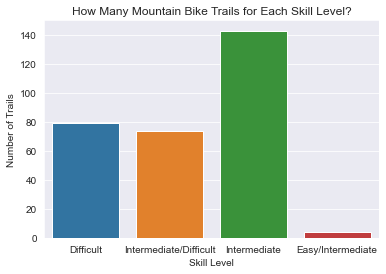

In [14]:
sns.set_style('darkgrid')

sns.countplot(data=mtb,x='trail_skill_level')

plt.title('How Many Mountain Bike Trails for Each Skill Level?')
plt.xlabel('Skill Level')
plt.ylabel('Number of Trails')

plt.show()

In [34]:
state_count = mtb.groupby(['trail_state'])['trail_name'].count().sort_values(ascending=False).reset_index()
state_count.head(7)

,trail_state,trail_name
0,CO,89
1,CA,40
2,UT,27
3,NC,21
4,AZ,17
5,MI,11
6,TX,9


In [39]:
top_10_state = state_count[:10]

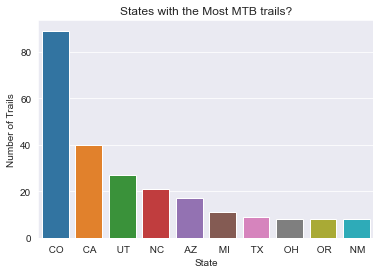

In [44]:

sns.barplot(data=top_10_state,x='trail_state',y='trail_name')

plt.title('States with the Most MTB trails?')
plt.xlabel('State')
plt.ylabel('Number of Trails')

plt.show()

In [46]:
trail_length = mtb.groupby(['trail_state'])['trail_length'].sum().sort_values(ascending=False).reset_index()
trail_length.head(15)

,trail_state,trail_length
0,CO,1824.6
1,CA,519.4
2,UT,448.8
3,AZ,285.3
4,NC,266.6
5,OR,117.5
6,MI,116.4
7,TX,112.8
8,GA,110.0
9,NM,97.0


In [48]:
top_10_length = trail_length[:6]

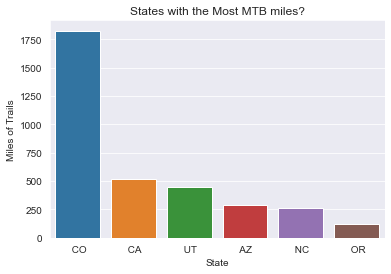

In [49]:
sns.barplot(data=top_10_length,x='trail_state',y='trail_length')

plt.title('States with the Most MTB miles?')
plt.xlabel('State')
plt.ylabel('Miles of Trails')

plt.show()

In [50]:
mtb['diff_in_elevation'] = mtb['trail_elevation_gain'] - mtb['trail_drop_elevation']
mtb.head()

,trail_name,trail_length,trail_drop_elevation,trail_elevation_gain,trail_location,trail_skill_level,trail_city,trail_state,diff_in_elevation
0,The Whole Enchilada,34.1,1283,7794,"Moab, UT",Difficult,Moab,UT,6511
1,Gooseberry Mesa - The Big Loop,13.1,554,553,"Hurricane, UT",Difficult,Hurricane,UT,-1
2,Little Scraggy Trail Loop,12.6,1432,1443,"Pine, CO",Intermediate/Difficult,Pine,CO,11
3,Monarch Crest - IMBA EPIC,36.2,2035,5890,"Whitepine, CO",Difficult,Whitepine,CO,3855
4,Porcupine Rim,14.7,1195,2962,"Moab, UT",Difficult,Moab,UT,1767


In [60]:
country = pd.read_csv(r'C:\Users\patri\mtb_countrytrails_scrape.csv')
country.head()

,country_name,country_url,country_recommended_route,country_recommended_route_url,country_number_trails,country_number_trails_url
0,Alberta,https://www.mtbproject.com/directory/8006683/a...,11 Recommended Routes,https://www.mtbproject.com/directory/8006683/a...,118 Trails,https://www.mtbproject.com/directory/8006683/a...
1,Argentina,https://www.mtbproject.com/directory/8012049/a...,1 Recommended Route,https://www.mtbproject.com/directory/8012049/a...,14 Trails,https://www.mtbproject.com/directory/8012049/a...
2,Armenia,https://www.mtbproject.com/directory/8019235/a...,14 Recommended Routes,https://www.mtbproject.com/directory/8019235/a...,42 Trails,https://www.mtbproject.com/directory/8019235/a...
3,Australia,https://www.mtbproject.com/directory/8011180/a...,5 Recommended Routes,https://www.mtbproject.com/directory/8011180/a...,141 Trails,https://www.mtbproject.com/directory/8011180/a...
4,Austria,https://www.mtbproject.com/directory/8012099/a...,2 Recommended Routes,https://www.mtbproject.com/directory/8012099/a...,21 Trails,https://www.mtbproject.com/directory/8012099/a...


In [61]:
country_data = country.drop(columns=['country_url', 'country_recommended_route_url', 'country_number_trails_url'])
country_data.head()

,country_name,country_recommended_route,country_number_trails
0,Alberta,11 Recommended Routes,118 Trails
1,Argentina,1 Recommended Route,14 Trails
2,Armenia,14 Recommended Routes,42 Trails
3,Australia,5 Recommended Routes,141 Trails
4,Austria,2 Recommended Routes,21 Trails


In [62]:
country_df = country_data.rename(columns = {'country_name':'country','country_recommended_route':'recommended_trails',
                                            'country_number_trails':'number_of_trails'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             92 non-null     object
 1   recommended_trails  92 non-null     object
 2   number_of_trails    92 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [64]:
country_df['recommended_trails'] = country_df['recommended_trails'].str.replace("Recommended Routes","")
country_df['recommended_trails'] = country_df['recommended_trails'].str.replace("Recommended Route","")

In [66]:
country_df['number_of_trails'] = country_df['number_of_trails'].str.replace("Trails","")
country_df['number_of_trails'] = country_df['number_of_trails'].str.replace("Trail","")

In [68]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             92 non-null     object
 1   recommended_trails  92 non-null     object
 2   number_of_trails    92 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [71]:
countrys_df = country_df.astype({"recommended_trails":'int64', "number_of_trails":'int64'}) 
countrys_df.dtypes

country               object
recommended_trails     int64
number_of_trails       int64
dtype: object

In [73]:
countrys_df.head(15)

,country,recommended_trails,number_of_trails
0,Alberta,11,118
1,Argentina,1,14
2,Armenia,14,42
3,Australia,5,141
4,Austria,2,21
5,Azerbaijan,0,2
6,Belarus,0,1
7,Belgium,24,534
8,Botswana,1,28
9,Brazil,19,98


In [75]:
countrys_df['Pertcent_trails_recommeded'] = (countrys_df['recommended_trails'] / countrys_df['number_of_trails']) *100

In [77]:
new_country = countrys_df.rename(columns = {'Pertcent_trails_recommeded':'percent_trails_recommended'})
new_country.head()

,country,recommended_trails,number_of_trails,percent_trails_recommended
0,Alberta,11,118,9.322034
1,Argentina,1,14,7.142857
2,Armenia,14,42,33.333333
3,Australia,5,141,3.546099
4,Austria,2,21,9.523810


In [78]:
new_country['percent_trails_recommended'] = round(new_country['percent_trails_recommended'],3)
new_country.head()

,country,recommended_trails,number_of_trails,percent_trails_recommended
0,Alberta,11,118,9.322
1,Argentina,1,14,7.143
2,Armenia,14,42,33.333
3,Australia,5,141,3.546
4,Austria,2,21,9.524


In [82]:
new_country.isnull().sum()

country                       0
recommended_trails            0
number_of_trails              0
percent_trails_recommended    1
dtype: int64

In [84]:
new_country.head(15)

,country,recommended_trails,number_of_trails,percent_trails_recommended
0,Alberta,11,118,9.322
1,Argentina,1,14,7.143
2,Armenia,14,42,33.333
3,Australia,5,141,3.546
4,Austria,2,21,9.524
5,Azerbaijan,0,2,0.000
6,Belarus,0,1,0.000
7,Belgium,24,534,4.494
8,Botswana,1,28,3.571
9,Brazil,19,98,19.388
